In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats
import scipy.stats as stats

%matplotlib inline
sns.set_palette("tab10")


In [2]:
hprice_df = pd.read_csv('house_price.csv')
hprice_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Bỏ các cột không cần thiết
cols_to_drop = ['Id']
hprice_df = hprice_df.drop(cols_to_drop, axis=1)

In [4]:
hprice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

# Task 1

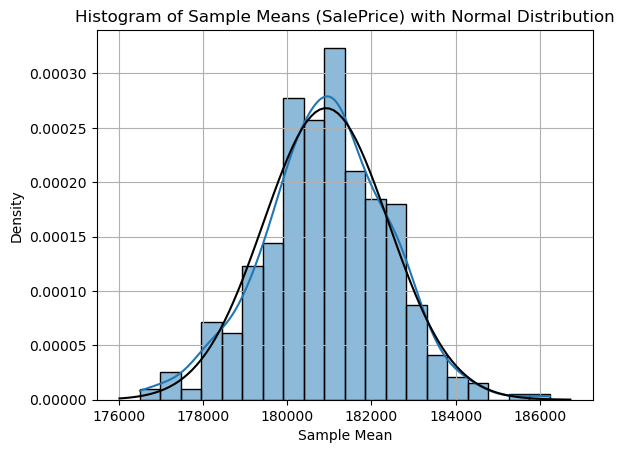

In [5]:
from scipy.stats import norm

# Set seed to 321
np.random.seed(321)
# Number of samples
n_samples = 400

# Sample size
sample_size = 1000

# Store the means of the samples
sample_means = []

# Generate samples and calculate means
for _ in range(n_samples):
    sample = hprice_df['SalePrice'].sample(sample_size, replace=False)
    sample_means.append(sample.mean())

# Plot histogram of sample means
sns.histplot(sample_means, kde=True, stat='density')  # Use stat='density' for a normalized histogram

# Plot the normal distribution line
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(sample_means), np.std(sample_means))
plt.plot(x, p, 'k')

plt.title('Histogram of Sample Means (SalePrice) with Normal Distribution')
plt.xlabel('Sample Mean')
plt.ylabel('Density')  # Changed from 'Frequency' to 'Density' since we are using stat='density'
plt.grid(True)
plt.show()


In [6]:
# Calculate mean and standard deviation of sample means
mean_of_sample_means = np.mean(sample_means)
std_dev_of_sample_means = np.std(sample_means)

print(f"Mean of sample means: {mean_of_sample_means}")
print(f"Standard deviation of sample means: {std_dev_of_sample_means}")

# Calculate mean and standard deviation of the entire dataset
mean_of_dataset = hprice_df['SalePrice'].mean()
std_dev_of_dataset = hprice_df['SalePrice'].std()

print(f"Mean of dataset: {mean_of_dataset}")
print(f"Standard deviation of dataset: {std_dev_of_dataset}")

# Compare with mean and standard deviation of sample means
print(f"Difference in means: {abs(mean_of_dataset - mean_of_sample_means)}")
print(f"Difference in standard deviations: {abs(std_dev_of_dataset - std_dev_of_sample_means)}")


Mean of sample means: 180921.15612000003
Standard deviation of sample means: 1487.690751673964
Mean of dataset: 180921.19589041095
Standard deviation of dataset: 79442.50288288663
Difference in means: 0.03977041092002764
Difference in standard deviations: 77954.81213121268


In [7]:
# Create a list of numerical columns
# numerical_cols = list(hprice_df.select_dtypes(include=['int', 'float']).columns)
numerical_cols = list(hprice_df.select_dtypes(include=[np.number]).columns)

# Create a list of categorical columns
categorical_cols = list(hprice_df.select_dtypes(include=['object']).columns)

# Print the lists
print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

Categorical columns: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Numerical columns: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageAre

# Task 2

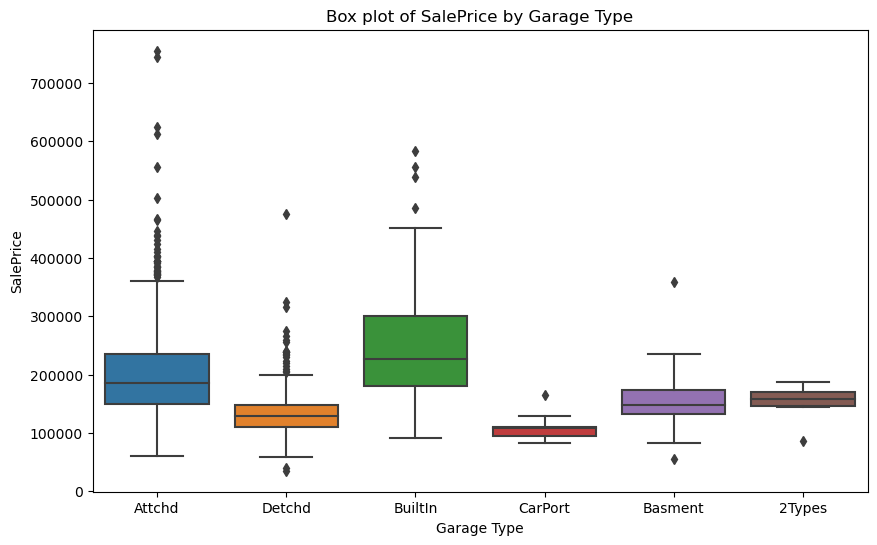

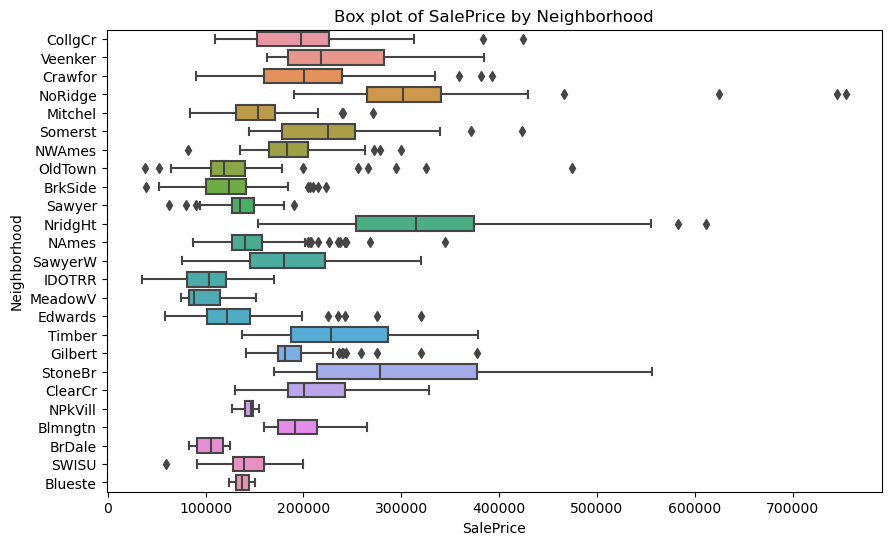

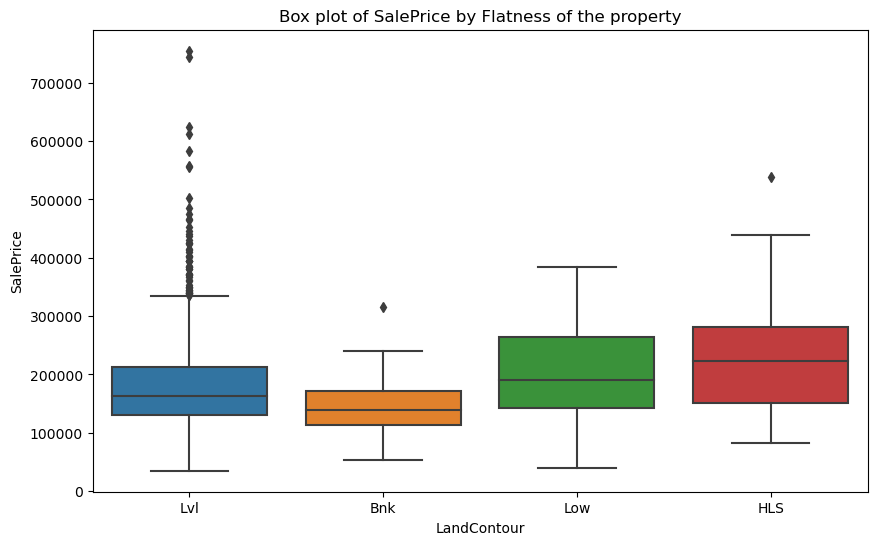

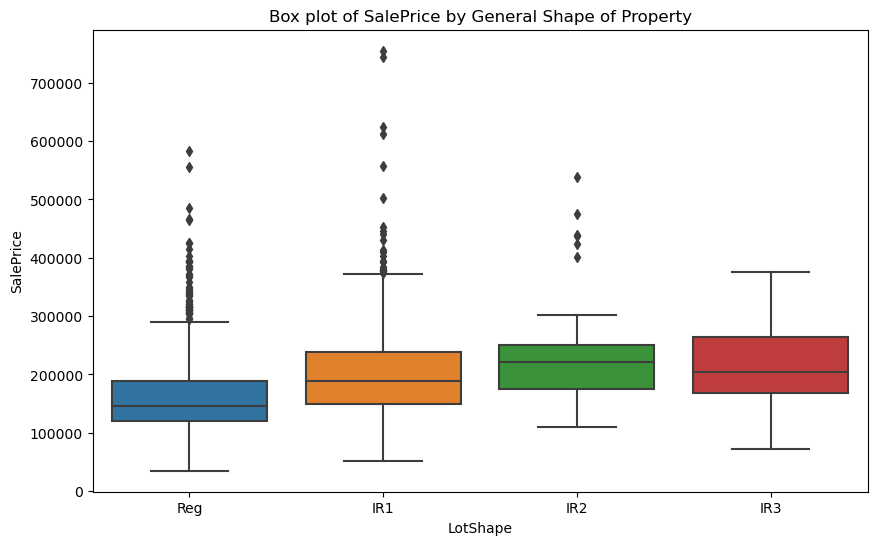

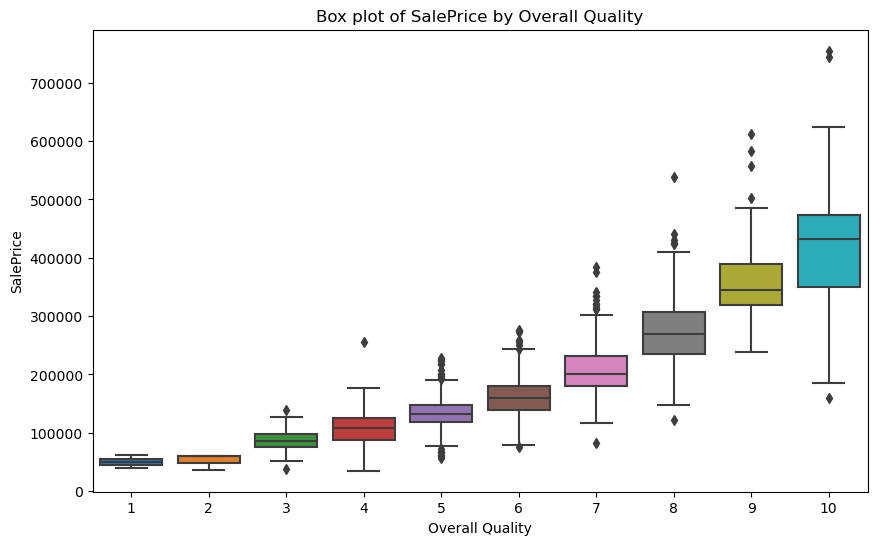

In [8]:
# Create a box plot for GarageType
plt.figure(figsize=(10, 6))
sns.boxplot(x='GarageType', y='SalePrice', data=hprice_df)
plt.title('Box plot of SalePrice by Garage Type')
plt.xlabel('Garage Type')
plt.ylabel('SalePrice')
plt.show()

# Create a box plot for Neighborhood
plt.figure(figsize=(10, 6))
sns.boxplot(x='SalePrice', y='Neighborhood', data=hprice_df)
plt.title('Box plot of SalePrice by Neighborhood')
plt.xlabel('SalePrice')
plt.ylabel('Neighborhood')
plt.show()

# Create a box plot for LandContour
plt.figure(figsize=(10, 6))
sns.boxplot(x='LandContour', y='SalePrice', data=hprice_df)
plt.title('Box plot of SalePrice by Flatness of the property')
plt.xlabel('LandContour')
plt.ylabel('SalePrice')
plt.show()

# Create a box plot for LotShape
plt.figure(figsize=(10, 6))
sns.boxplot(x='LotShape', y='SalePrice', data=hprice_df)
plt.title('Box plot of SalePrice by General Shape of Property')
plt.xlabel('LotShape')
plt.ylabel('SalePrice')
plt.show()

# Create a box plot for Overall Quality
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=hprice_df)
plt.title('Box plot of SalePrice by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('SalePrice')
plt.show()

- SalePrice by Garage Type: Houses with BuiltIn garages tend to have higher sale prices, while those with CarPort and 2Types garages generally have lower prices. However, there’s significant variability within each garage type, indicating other factors at play.
- SalePrice by Neighborhood: Significant variation in sale prices across neighborhoods. Notably, NoRidge, NridgHt, and StoneBr have higher median sale prices, indicating a diverse range of home values within these areas.
- SalePrice by Flatness of the property: Properties with a “Lvl” (Level) land contour have a wider range of sale prices, with several high-value outliers. In contrast, “HLS” (Hillside) contours generally have higher but more consistent sale prices.
- SalePrice by General Shape of Property: Properties with an “IR1” lot shape tend to have higher median sale prices, while “Reg” and “IR3” lot shapes exhibit more variability in sale prices. This suggests that lot shape can influence property sale prices.
- SalePrice by Overall Quality: A positive correlation between SalePrice and Overall Quality; as the quality rating increases, the sale price tends to increase as well. However, there’s significant variability within each quality level, especially at higher levels (9 and 10), indicating other factors at play.

=> Sale price of houses is influenced by various factors such as garage type, neighborhood, land contour, lot shape, and overall quality. While some factors like BuiltIn garages, certain neighborhoods, and high overall quality tend to increase sale prices, there’s significant variability within each category, indicating the presence of other influencing factors.

# Task 3

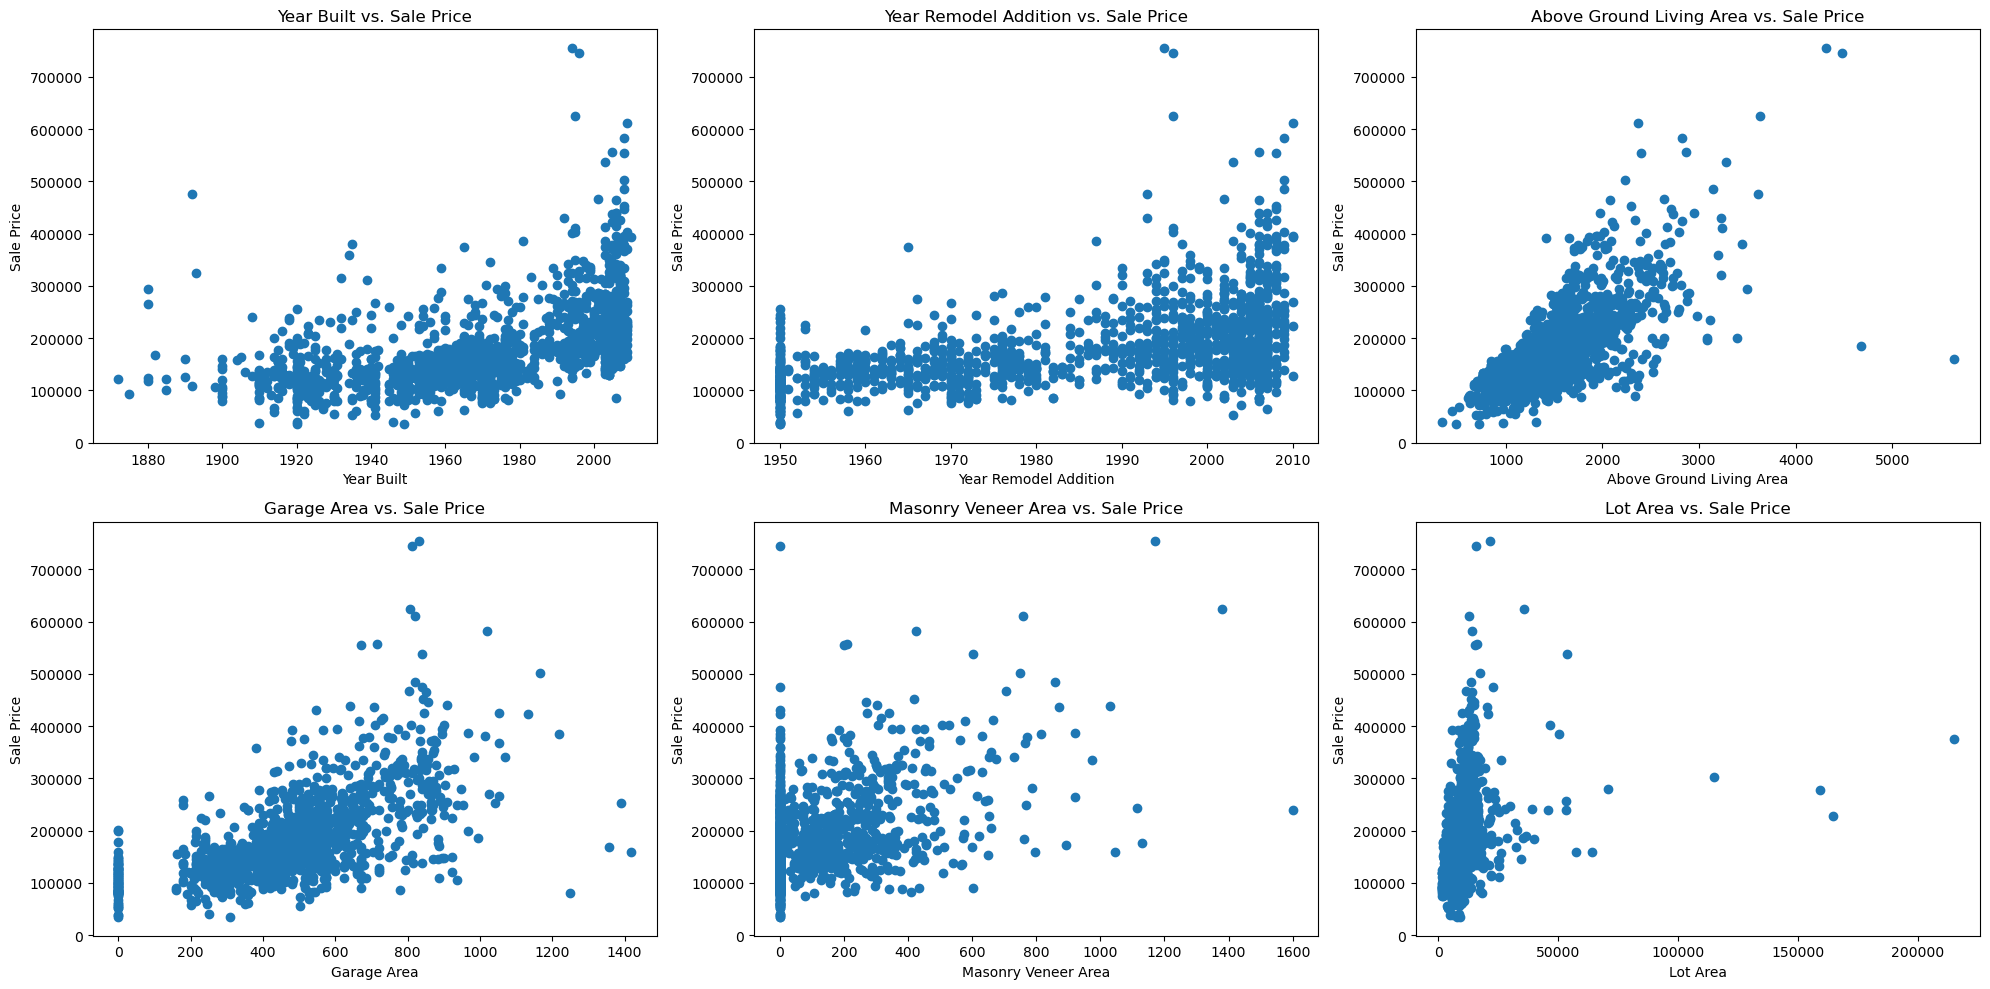

In [9]:
# Create scatter plots 
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.scatter(hprice_df['YearBuilt'], hprice_df['SalePrice'])
plt.title('Year Built vs. Sale Price')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')

plt.subplot(2, 3, 2)
plt.scatter(hprice_df['YearRemodAdd'], hprice_df['SalePrice'])
plt.title('Year Remodel Addition vs. Sale Price')
plt.xlabel('Year Remodel Addition')
plt.ylabel('Sale Price')

plt.subplot(2, 3, 3)
plt.scatter(hprice_df['GrLivArea'], hprice_df['SalePrice'])
plt.title('Above Ground Living Area vs. Sale Price')
plt.xlabel('Above Ground Living Area')
plt.ylabel('Sale Price')

plt.subplot(2, 3, 4)
plt.scatter(hprice_df['GarageArea'], hprice_df['SalePrice'])
plt.title('Garage Area vs. Sale Price')
plt.xlabel('Garage Area')
plt.ylabel('Sale Price')


plt.subplot(2, 3, 5)
plt.scatter(hprice_df['MasVnrArea'], hprice_df['SalePrice'])
plt.title('Masonry Veneer Area vs. Sale Price')
plt.xlabel('Masonry Veneer Area')
plt.ylabel('Sale Price')

plt.subplot(2, 3, 6)
plt.scatter(hprice_df['LotArea'], hprice_df['SalePrice'])
plt.title('Lot Area vs. Sale Price')
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')

plt.tight_layout()
plt.show()

- Year Built vs Sale Price: There’s a positive correlation, indicating newer homes tend to have higher sale prices.
- Year Remodel/Addition vs Sale Price: Properties that have been more recently remodeled or had additions tend to have a higher sale price, showing a positive trend.
- Above Ground Living Area vs Sale Price: A strong positive correlation is observed, larger living areas are associated with higher sale prices.
- Garage Area vs Sale Price: A positive correlation exists, though with some variability. Larger garage areas generally correlate with higher sale prices but not as strongly as above ground living area.
- Masonry Veneer Area vs Sale Price: A weak positive correlation is observed; however, there’s significant spread in the data points indicating other factors likely influence the sale price significantly.
- Lot Area vs Sale Price: A weak positive correlation is observed with many outliers; larger lot areas don’t necessarily equate to significantly higher prices.

=> These relationships suggest that factors such as the year of construction, size of the living area, and garage area have a significant impact on the sale price of a property.

# Task 4

In [10]:
from sklearn.preprocessing import LabelEncoder

# Print the shape of the DataFrame before LabelEncoding
print("Shape before LabelEncoding: ", hprice_df.shape)

hprice_df_le = pd.DataFrame()

# Apply LabelEncoding to the categorical columns
for col in categorical_cols:
    le = LabelEncoder()
    hprice_df_le[col] = le.fit_transform(hprice_df[col])

# Print the shape of the DataFrame after LabelEncoding
print("Shape after LabelEncoding: ", hprice_df_le.shape)

Shape before LabelEncoding:  (1460, 80)
Shape after LabelEncoding:  (1460, 43)


In [11]:
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object
enc = OneHotEncoder(sparse_output=False)

# Print the shape of the DataFrame before OneHotEncoding
print("Shape before OneHotEncoding: ", hprice_df.shape)

# Apply OneHotEncoder to categorical columns
# categorical_cols = hprice_df.select_dtypes(include=[object]).columns
one_hot = enc.fit_transform(hprice_df[categorical_cols])

# Convert the result back into a dataframe
one_hot_df = pd.DataFrame(one_hot, columns=enc.get_feature_names_out(categorical_cols))

# Concatenate the original DataFrame with the one-hot encoded columns
hprice_df_ohe = pd.concat([hprice_df.drop(categorical_cols, axis=1), one_hot_df], axis=1)

# Print the shape of the DataFrame after OneHotEncoding
print("Shape after OneHotEncoding: ", hprice_df_ohe.shape)

Shape before OneHotEncoding:  (1460, 80)
Shape after OneHotEncoding:  (1460, 304)


# Task 5

In [12]:
# Check missing values
miss = hprice_df.isna().sum()
miss = miss[miss > 0]
print(miss)

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [13]:
# Check data type of missing columns and put them in two lists to be used for imputation
miss_cat_cols = []
miss_num_cols = []
for col in miss.index:
    if hprice_df[col].dtype == 'object':
        miss_cat_cols.append(col)
    else:
        miss_num_cols.append(col)
print('Categorical columns with missing values:',miss_cat_cols)
print('Numerical columns with missing values:',miss_num_cols)

Categorical columns with missing values: ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
Numerical columns with missing values: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


             LotFrontage  MasVnrArea  GarageYrBlt  SalePrice
LotFrontage     1.000000    0.193458     0.070250   0.351799
MasVnrArea      0.193458    1.000000     0.252691   0.477493
GarageYrBlt     0.070250    0.252691     1.000000   0.486362
SalePrice       0.351799    0.477493     0.486362   1.000000


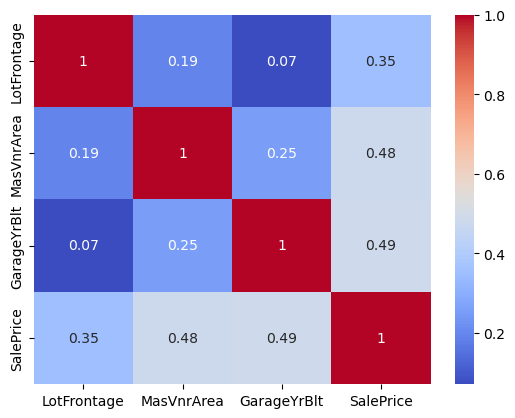

In [14]:
# Correlation matrix
correlation_matrix = hprice_df[miss_num_cols + ['SalePrice']].corr()
print(correlation_matrix) # Print the correlation_matrix
# Plot the correlation matrix as a heatmap for correlation_matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [15]:
# Drop missing values from columns if they are less than or equal to 3%
# Calculate the threshold for dropping missing values
threshold = len(hprice_df) * 0.03

# Find the columns that have missing values less than or equal to the threshold
cols_to_drop = hprice_df.columns[hprice_df.isna().sum() <= threshold]

# Drop the missing values from those columns
hprice_df.dropna(subset=cols_to_drop, inplace=True)


In [16]:
# Handle outliers
def remove_outliers(data, column, z_score_threshold=3):
    z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())
    data = data[z_scores < z_score_threshold]
    return data

# Remove outliers in numerical columns for hprice_df with z-score threshold of 3
for col in numerical_cols:
    hprice_df = remove_outliers(hprice_df, col, z_score_threshold=3)   

In [17]:
from sklearn.impute import KNNImputer

# Create a KNN imputer object
imputer = KNNImputer(n_neighbors=5)

# Select numerical columns
numerical_data = hprice_df.select_dtypes(include=[np.number])

# Apply the imputer to the numerical columns
imputed = imputer.fit_transform(numerical_data)

# Convert the result back into a dataframe
hprice_df[numerical_data.columns] = pd.DataFrame(imputed, columns=numerical_data.columns)


Correlation matrix before imputation:
              LotFrontage  MasVnrArea  GarageYrBlt  SalePrice
LotFrontage     1.000000    0.193458     0.070250   0.351799
MasVnrArea      0.193458    1.000000     0.252691   0.477493
GarageYrBlt     0.070250    0.252691     1.000000   0.486362
SalePrice       0.351799    0.477493     0.486362   1.000000
Correlation matrix after imputation:
              LotFrontage  MasVnrArea  GarageYrBlt  SalePrice
LotFrontage     1.000000    0.094938     0.064360   0.416287
MasVnrArea      0.094938    1.000000     0.263141   0.412831
GarageYrBlt     0.064360    0.263141     1.000000   0.550105
SalePrice       0.416287    0.412831     0.550105   1.000000


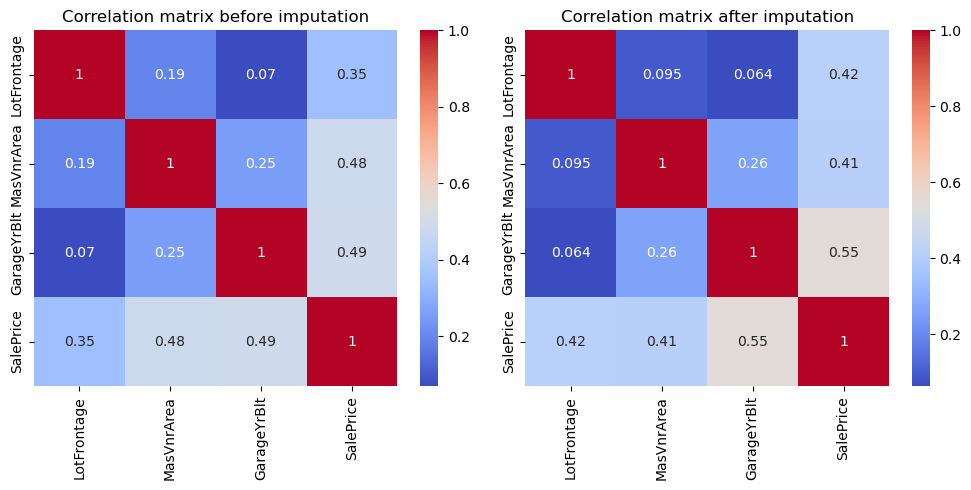

In [18]:
# Correlation matrix after imputation
correlation_matrix_imputed = hprice_df[miss_num_cols + ['SalePrice']].corr()
print('Correlation matrix before imputation:\n', correlation_matrix)
print('Correlation matrix after imputation:\n', correlation_matrix_imputed)
# Plot heatmaps for correlation_matrix and correlation_matrix_imputed into subplots 1 and 2 respectively
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Correlation matrix before imputation')

sns.heatmap(correlation_matrix_imputed, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlation matrix after imputation')

plt.tight_layout()
plt.show()